In [1]:
import os, re, json, string, pickle

import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbriz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('bigdata.csv')
data.head(10)

,Date,Content
0,2022-04-08 02:26:38+00:00,b'@MythiaVTuber canggung kenapa \xf0\x9f\x98\x...
1,2022-04-08 01:54:44+00:00,b'@MythiaVTuber Apa aja bebas yang penting enak'
2,2022-04-08 01:51:28+00:00,"b'@MythiaVTuber Waduh, abang-abangan nih\xf0\x..."
3,2022-04-08 01:40:46+00:00,b'@MythiaVTuber ini kak https://t.co/zwEAdqagXV'
4,2022-04-08 00:35:13+00:00,b'@MythiaVTuber Astaga kalian berdua aowkkwkw'
5,2022-04-07 20:19:22+00:00,b'@MythiaVTuber Gila! Jam 23:41 belum tidur. A...
6,2022-04-07 20:13:55+00:00,b'@MythiaVTuber Ya ampun \xf0\x9f\x98\xad\xf0\...
7,2022-04-07 19:49:32+00:00,"b'@KeigoAria @MythiaVTuber Lautan asin , bisa""..."
8,2022-04-07 18:17:45+00:00,b'@MythiaVTuber Ga ngerti tolong di jelaskan'
9,2022-04-07 17:50:23+00:00,b'@MythiaVTuber Ari si anak tersesat\xf0\x9f\x...


In [3]:
# Cleanner 
def cleaning(text):
  text = text[2:]  
  return text

In [4]:
data['Content'] =  data['Content'].apply(lambda x : cleaning(x))
data['Content'].values

array(["@MythiaVTuber canggung kenapa \\xf0\\x9f\\x98\\xb3\\xf0\\x9f\\x91\\x89\\xf0\\x9f\\x8f\\xbb\\xf0\\x9f\\x91\\x88\\xf0\\x9f\\x8f\\xbb, takut kakak tiba2 nyulik aku kah? \\xf0\\x9f\\x98\\xb3\\xf0\\x9f\\x91\\x89\\xf0\\x9f\\x8f\\xbb\\xf0\\x9f\\x91\\x88\\xf0\\x9f\\x8f\\xbb'",
       "@MythiaVTuber Apa aja bebas yang penting enak'",
       "@MythiaVTuber Waduh, abang-abangan nih\\xf0\\x9f\\xa4\\xad, btw andi adek nya banyak ya wkwkw'",
       ...,
       "@MentalMuHancur @kobokanaeru Selamat ulang tahun, jangan diulangin lagi'",
       "celamatt babyy kobo ku @kobokanaeru \\xf0\\x9f\\x92\\x97 gbu'",
       "@kobokanaeru yeayyy selamat ojou-sama \\xf0\\x9f\\xa5\\xb3\\xf0\\x9f\\xa5\\xb3\\xf0\\x9f\\xa5\\xb3'"],
      dtype=object)

In [5]:
data.head(10)

,Date,Content
0,2022-04-08 02:26:38+00:00,@MythiaVTuber canggung kenapa \xf0\x9f\x98\xb3...
1,2022-04-08 01:54:44+00:00,@MythiaVTuber Apa aja bebas yang penting enak'
2,2022-04-08 01:51:28+00:00,"@MythiaVTuber Waduh, abang-abangan nih\xf0\x9f..."
3,2022-04-08 01:40:46+00:00,@MythiaVTuber ini kak https://t.co/zwEAdqagXV'
4,2022-04-08 00:35:13+00:00,@MythiaVTuber Astaga kalian berdua aowkkwkw'
5,2022-04-07 20:19:22+00:00,@MythiaVTuber Gila! Jam 23:41 belum tidur. And...
6,2022-04-07 20:13:55+00:00,@MythiaVTuber Ya ampun \xf0\x9f\x98\xad\xf0\x9...
7,2022-04-07 19:49:32+00:00,"@KeigoAria @MythiaVTuber Lautan asin , bisa"" k..."
8,2022-04-07 18:17:45+00:00,@MythiaVTuber Ga ngerti tolong di jelaskan'
9,2022-04-07 17:50:23+00:00,@MythiaVTuber Ari si anak tersesat\xf0\x9f\xa4...


In [6]:
# Preprocessor
def preprocessor(text):
    # Convert to lower case
    text = text.lower()
    # Convert www.* or https?://* to URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    # Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1',text)
    # Menghapus angka dari teks
    text = re.sub(r"\d+", "", text)
    # Menganti tanda baca dengan spasi
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    # Remove additional code
    text = text.replace('xa', '')
    text = text.replace('xb', '')
    text = text.replace('xc', '')
    text = text.replace('xd', '')
    text = text.replace('xe', '')
    text = text.replace('xf', '')
    text = text.replace('xh', '')
    text = text.replace('xi', '')
    text = text.replace('xj', '')
    text = text.replace('xk', '')
    text = text.replace('xl', '')
    text = text.replace('xn', '')
    text = text.replace('xo', '')
    text = text.replace('xp', '')
    text = text.replace('xq', '')
    text = text.replace('xr', '')
    text = text.replace('xs', '')
    text = text.replace('xt', '')
    text = text.replace('xu', '')
    text = text.replace('xv', '')
    text = text.replace('xw', '')
    text = text.replace('xx', '')
    text = text.replace('xy', '')
    text = text.replace('xz', '')
    text = text.replace('xaa', '')
    text = text.replace('x', '')
    text = text.replace(' b ', '')
    text = text.replace(' e ', '')
    text = text.replace(' c ', '')
    text = text.replace(' d ', '')
    text = text.replace(' f ', '')
    text = text.replace(' a ', '')
    text = text.replace(' n ', '')
    # Remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
    return text
data['Content'] = data['Content'].apply(lambda x : preprocessor(x))
data['Content'].values

data.head(10)

,Date,Content
0,2022-04-08 02:26:38+00:00,canggung kenapa takut kakak tiba nyulik aku kah
1,2022-04-08 01:54:44+00:00,apa aja bebas yang penting enak
2,2022-04-08 01:51:28+00:00,waduh abang abangan nih btw andi adek nya ban...
3,2022-04-08 01:40:46+00:00,ini kak
4,2022-04-08 00:35:13+00:00,astaga kalian berdua aowkkwkw
5,2022-04-07 20:19:22+00:00,gila jam belum tidur anda pekerja keras sekal...
6,2022-04-07 20:13:55+00:00,ya ampun
7,2022-04-07 19:49:32+00:00,lautan asin bisa kekurangan gula awokawok
8,2022-04-07 18:17:45+00:00,ga ngerti tolong di jelaskan
9,2022-04-07 17:50:23+00:00,ari si anak tersesat


In [7]:
# Create Stopword
with open("stopwords.txt", "r") as f:
    stop_words = f.readline()
    stop_words = stop_words.split()

In [8]:
# Fungsi save hasil data yang sudah dibersihkan
data.to_csv('cleaned.csv')

In [9]:
# Tokenizer
def tokenizer(text):
    words = word_tokenize(text)
    tokens=[]
    for w in words:
        # add tokens
        if len(w) > 3 and w not in stop_words:
            w = stemmer.stem(w)
            tokens.append(w.lower())
    return " ".join(tokens)

In [10]:
# Untuk menghemat waktu running dilakukan loading tweet yang sudah
# dibersihkan sebelumnya
# with open('/content/Cleaned Data.txt') as reader:
#     data['Content'] = reader.read().split("\n")

with open('cleaned.csv', 'rb') as f:
  contents = f.read()
# Uncomment dan run kode di bawah jika mengganti atau menambahkan
# metode preprocess data text, proses running membutuhkan waktu
# yang cukup lama (sekitar 1 jam)
# data['Content'] = data['Content'].apply(lambda x : tokenizer(x))

# data['Content'].values

In [11]:
# Defining Vectorizer object
vectorizer_tfidf = TfidfVectorizer(min_df=0.01, max_df=0.6)

# Load saved vectorizer
# vectorizer_tfidf = pickle.load(open('../model/vectorizer/vectorizer_tfidf.pickle', 'rb'))

In [12]:
# fit and transform text data
word_tfidf = vectorizer_tfidf.fit_transform(data['Content'].values)

# Load saved transformed data
# word_tfidf = pickle.load(open('../model/vectorizer/word_tfidf.pickle', 'rb'))

In [13]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 8346
Jumlah fitur   = 82


c:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row 
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes 
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {'nomor artikel': n+1, 'nilai TFIDF': highestTFIDFvalue,
                'top word': highestTFIDFword}
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar 
words_data = pd.DataFrame({
    'Kata': words,
    'Banyak': n
}).sort_values(by='Banyak', ascending=False).head(20)
words_data 

,Kata,Banyak
81,yuk,1742
56,pagi,590
80,yopi,354
27,iofi,149
62,selamat,141
79,yop,121
40,kobo,110
66,skejul,106
72,vtuber,105
24,hololive,104


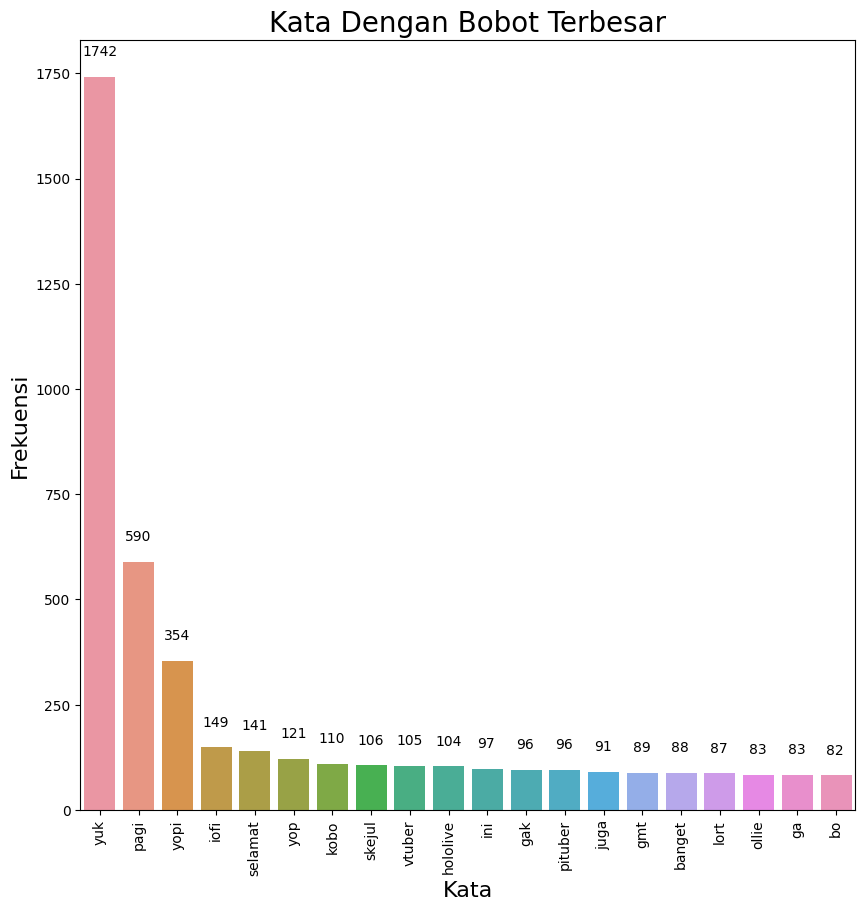

In [15]:
# Plotting Barplot
plt.figure(figsize = (10,10))
sns.barplot(x = words_data['Kata'],y = words_data['Banyak'])
for i, v in enumerate(words_data['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 50, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

Modelling

In [16]:
# Load data hasil dari proses labeling
sample = pd.read_csv('label.csv')
sample['Label'].astype('int64', errors='ignore')
sample.head(10)

,Unnamed: 0,Date,Content,Label
0,0,2022-04-08 02:26:38+00:00,canggung kenapa takut kakak tiba nyulik aku kah,0
1,1,2022-04-08 01:54:44+00:00,apa aja bebas yang penting enak,2
2,2,2022-04-08 01:51:28+00:00,waduh abang abangan nih btw andi adek nya ban...,2
3,3,2022-04-08 01:40:46+00:00,ini kak,1
4,4,2022-04-08 00:35:13+00:00,astaga kalian berdua aowkkwkw,0
5,5,2022-04-07 20:19:22+00:00,gila jam belum tidur anda pekerja keras sekal...,2
6,6,2022-04-07 20:13:55+00:00,ya ampun,0
7,7,2022-04-07 19:49:32+00:00,lautan asin bisa kekurangan gula awokawok,0
8,8,2022-04-07 18:17:45+00:00,ga ngerti tolong di jelaskan,0
9,9,2022-04-07 17:50:23+00:00,ari si anak tersesat,0


In [17]:
# sample['Content'] = sample['Content'].apply(lambda x : cleaning(x))
# sample['Content'] = sample['Content'].apply(lambda x : preprocessor(x))
# sample['Content'] = sample['Content'].apply(lambda x : tokenizer(x))
# sample['Content'].values[:5]

In [18]:
from collections import Counter
from re import X
x = vectorizer_tfidf.transform(sample['Content'].values)
y = sample['Label'].values
counter = Counter(y)
print(counter)

Counter({2: 2063, 1: 1501, 0: 437})


In [19]:
# Oversample dataset yang imba dengan Random Over Sampler (ROS)
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from numpy import where

# mendefinisikan metode oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# merubah dataset
x, y = oversample.fit_resample(x, y)
# menghitung hasil dari oversampling
counter = Counter(y)
print(counter)

Counter({0: 2063, 2: 2063, 1: 1501})


dikarenakan data dengan nilai netral masih tidak seimbang, maka diperlukan sampling sekali lagi

In [20]:
# Oversample dataset yang imba dengan Random Over Sampler (ROS)
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from numpy import where

# mendefinisikan metode oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# merubah dataset
x, y = oversample.fit_resample(x, y)
# menghitung hasil dari oversampling
counter = Counter(y)
print(counter)

Counter({0: 2063, 2: 2063, 1: 2063})


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1500)
x_train = x_train.toarray

In [ ]:
# Modelling
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import ComplementNB
# from sklearn.svm import SVC
# from sklearn import metrics

# classifiers = {
#    "Decision Tree Classifier": DecisionTreeClassifier(),
#    "Logistic Regression": LogisticRegression(),
#    "Random Forest Classifier": RandomForestClassifier(),
#    "Bernoulli Naive Bayes" : BernoulliNB(),
#    "Multinomial Naive Bayes" : MultinomialNB(),
#    "Complement Naive Bayes" : ComplementNB(),
#    "SVM": SVC(probability=True)    
# }

# for name in classifiers.keys():
#    classifiers[name].fit(x_train, y_train)
#    y_pred = classifiers[name].predict(x_valid)
#    print(f"Akurasi dari {name} : ",metrics.accuracy_score(y_valid, y_pred))

In [24]:
# Modelling
# import library
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

# mendefinisikan classifiers yang digunakan
classifiers = {

    "Categorical Naive Bayes" : CategoricalNB(min_categories=sample.nunique())
}

for name in classifiers.keys():
    
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Akurasi dari {name} : ",metrics.accuracy_score(y_valid, y_pred))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'method'

In [ ]:
# menghitung nilai akurasi dari classifier
for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Akurasi dari {name} : ",metrics.accuracy_score(y_valid, y_pred))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
#menghitung nilai recall dari classifier
for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Recall dari {name} : ",metrics.recall_score(y_valid, y_pred, average='weighted'))

In [ ]:
#menghitung nilai precission dari classifier
for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Precission dari {name} : ",metrics.precision_score(y_valid, y_pred, average='weighted'))

In [ ]:
# menghitung nilai f1 score dari classifier
for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"F1 Score dari {name} : ",metrics.f1_score(y_valid, y_pred, average='weighted'))

Deployment data

In [ ]:
data['prediction'] = classifiers['Multinomial Naive Bayes'].predict(word_tfidf)
data.head(10)

In [ ]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = data['Content'].groupby(data['prediction']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif','Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [ ]:
# Melihat banyak Tweet perhari berdasarkan sentiment
data['Date'] = pd.to_datetime(data['Date'])
tph = data['Content'].groupby([data['Date'].dt.date, data['prediction']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Date':tanggal,'Sentiment':senti, 'Frekuensi':frek})

In [ ]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Date',y='Frekuensi',hue='Sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()

In [ ]:
####################
## Saving Objects ##
####################

# if not os.path.isdir('output'):
#     os.mkdir('output')

if not os.path.isdir('model'):
    os.mkdir('model')

# Export data baru
# Saving Model
for name, model in classifiers.items():
    pickle.dump(model, open(f"hasil visualisasi\[TRAINED] {name}_{datetime.today().strftime('%Y-%m-%d')}.pickle", "wb"))
    
# Saving Vectorizer
# pickle.dump(vectorizer_tfidf, open("../model/vectorizer/vectorizer_tfidf.pickle", "wb"))
# pickle.dump(word_tfidf, open("../model/vectorizer/word_tfidf.pickle", "wb"))